**Importing Dataset**

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB

**Importing Dataset**

In [100]:
df1=pd.read_csv('../input/world-university-rankings/cwurData.csv')
df1.head(2)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012


In [101]:
df1.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [102]:
df1.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [103]:
df1['broad_impact']=df1['broad_impact'].fillna(df1.groupby(['institution'])['broad_impact'].transform('mean'))
df1['broad_impact']=df1['broad_impact'].fillna(0)

In [104]:
df1.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [105]:
df1.shape

(2200, 14)

**Pearson Coefficient**

In [106]:
from scipy.stats.stats import pearsonr
features = ['quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','broad_impact','patents']
target = 'score'
for feature in features:
    coeff = pearsonr(df1[feature], df1[target])[0]
    print('Pearson correlation for ' + feature + ' coeff: ' + str(coeff))

Pearson correlation for quality_of_education coeff: -0.6005406287207993
Pearson correlation for alumni_employment coeff: -0.5103735958571962
Pearson correlation for quality_of_faculty coeff: -0.693539920150738
Pearson correlation for publications coeff: -0.522111322538575
Pearson correlation for influence coeff: -0.5228372990601702
Pearson correlation for citations coeff: -0.5224383145766369
Pearson correlation for broad_impact coeff: -0.5283991771481678
Pearson correlation for patents coeff: -0.4748099206717428


In [107]:
df_top100 = df1.iloc[:100,:]

In [108]:
import plotly.graph_objs as go

In [109]:
citation= go.Scatter(x = df_top100.world_rank,y = df_top100.citations,mode = "lines",name = "citations",marker = dict(color = 'rgba(16, 112, 2, 0.8)'),text= df_top100.institution)
teaching= go.Scatter(x = df_top100.world_rank, y = df_top100.quality_of_faculty, mode = "lines+markers", name = "teaching",marker = dict(color = 'rgba(80, 26, 80, 0.8)'),text= df_top100.institution)

In [110]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)  
# Create a list to add traces
data = [citation, teaching]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False))
fig1 = dict(data = data, layout = layout)
iplot(fig1)

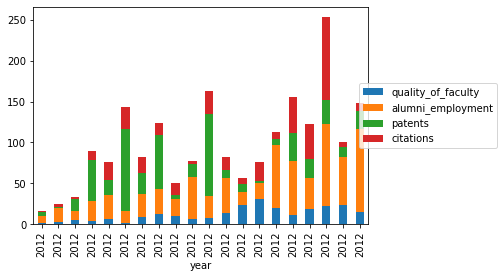

In [111]:
# Plot evolution of each criteria of the ranking
df2 = df1[['year', 'quality_of_faculty', 'alumni_employment', 'patents', 'citations']].head(20)
ax = df2.plot.bar( stacked=True, x='year')
ax.legend(loc=7, bbox_to_anchor=(1.4, 0.5))

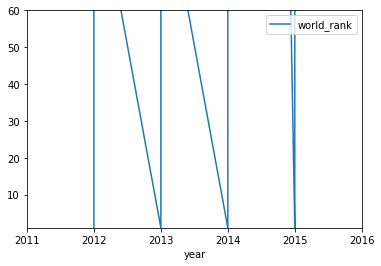

In [112]:
df1['world_rank'] = df1['world_rank'].astype('int64')
df1['national_rank'] = df1['national_rank'].astype('float64')
df1['broad_impact'] = df1['broad_impact'].astype('float64')
df1['score'] = df1['score'].astype('float64')
# Plot evolution of ranking
ax = df1.plot(kind='line',  x='year',  y='world_rank', xlim=(2011, 2016),  ylim=(1, 60),  xticks=range(2011, 2017))
# Have ints for the labels
ax.ticklabel_format(useOffset=False, style='plain')

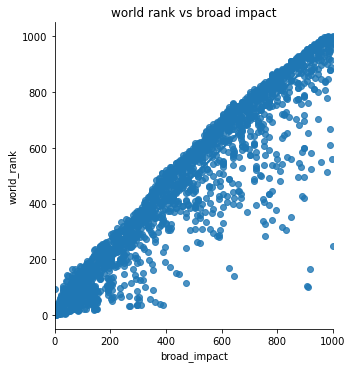

In [113]:
sns.lmplot(x = 'broad_impact',y= 'world_rank',data = df1)
plt.title('world rank vs broad impact')
plt.show()

**Piechart**

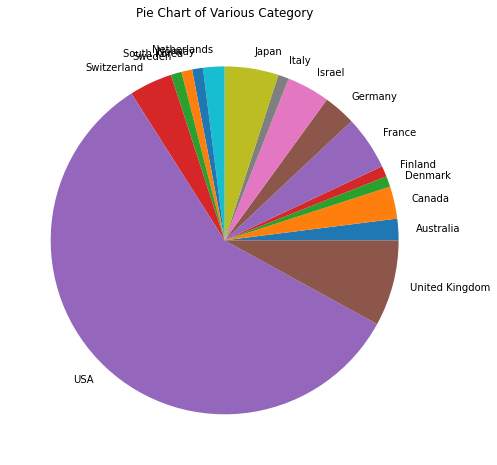

In [114]:
# Prepare Data
dff=df1.head(100)
df= dff.groupby('country').size()
# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Various Category")
plt.ylabel("")
plt.show()

**Countplot**

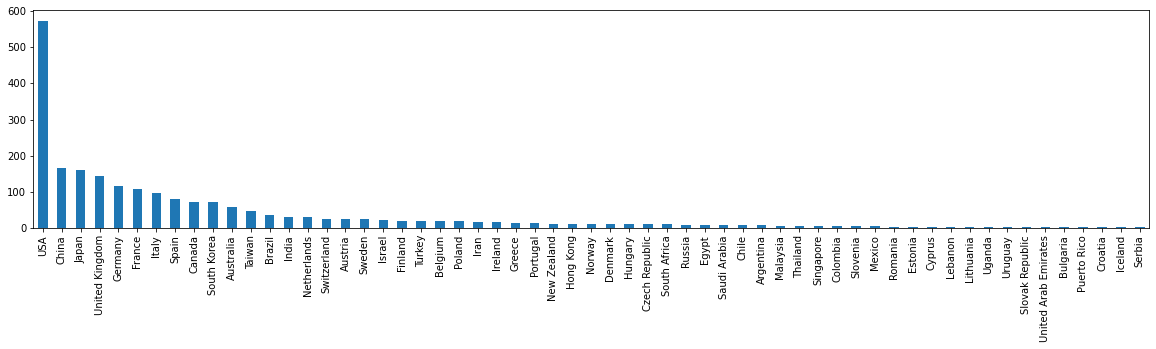

In [115]:
f,ax=plt.subplots(1,1,figsize=(20,4))
df1['country'].value_counts().plot(kind='bar')

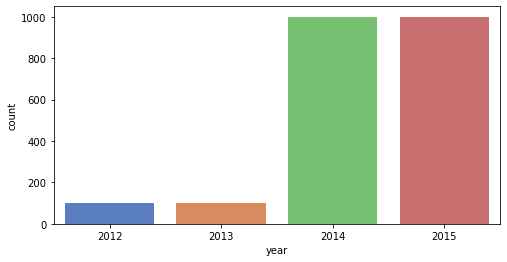

In [116]:
f,ax=plt.subplots(1,1,figsize=(8,4))
sns.countplot(x="year",data=df1,palette="muted")

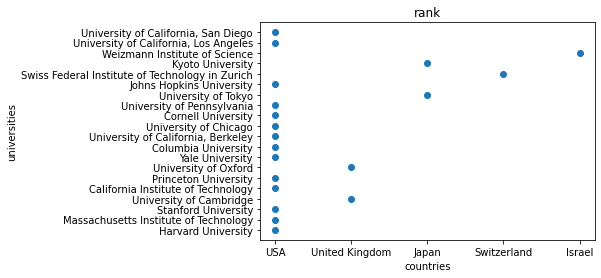

In [117]:
import matplotlib.pyplot as plt
new=df1.head(20)
plt.scatter(new.country,new.institution,) #scatter plot example
plt.xlabel('countries')
plt.ylabel('universities')
plt.title('rank')
plt.show()

**Boxplot**

Text(0.5, 0, 'quality_of_faculty')

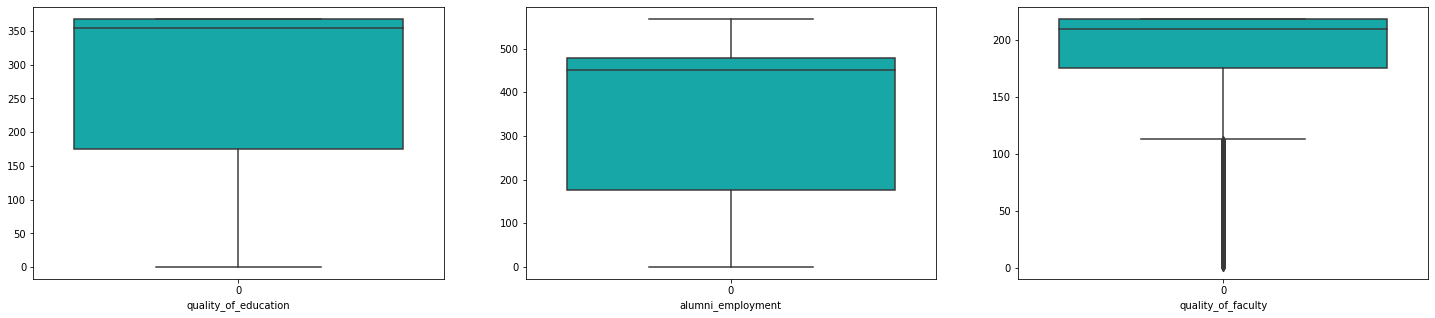

In [118]:
f,ax=plt.subplots(1,3,figsize=(25,5))
box1=sns.boxplot(data=df1["quality_of_education"],ax=ax[0],color='c')
ax[0].set_xlabel('quality_of_education')
box1=sns.boxplot(data=df1["alumni_employment"],ax=ax[1],color='c')
ax[1].set_xlabel('alumni_employment')
box1=sns.boxplot(data=df1["quality_of_faculty"],ax=ax[2],color='c')
ax[2].set_xlabel('quality_of_faculty')

Text(0.5, 0, 'citations')

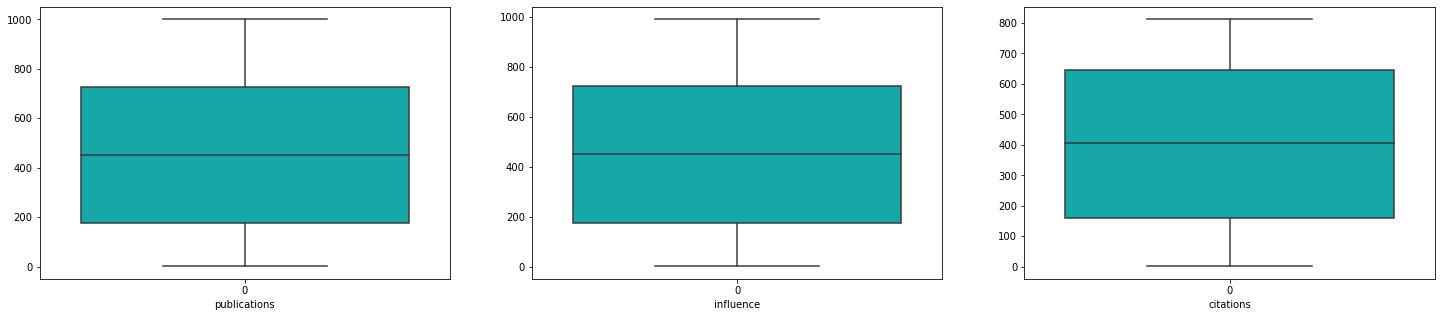

In [119]:
f,ax=plt.subplots(1,3,figsize=(25,5))
box1=sns.boxplot(data=df1["publications"],ax=ax[0],color='c')
ax[0].set_xlabel('publications')
box1=sns.boxplot(data=df1["influence"],ax=ax[1],color='c')
ax[1].set_xlabel('influence')
box1=sns.boxplot(data=df1["citations"],ax=ax[2],color='c')
ax[2].set_xlabel('citations')

**Heatmap**

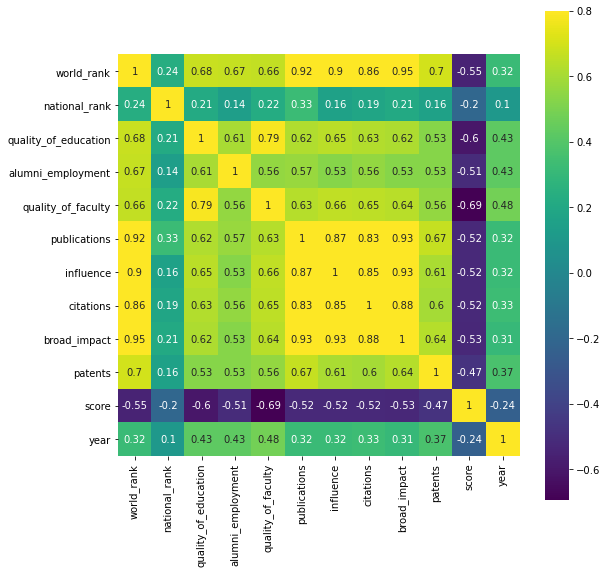

In [120]:
corr = (df1.corr())
plt.subplots(figsize=(9, 9))
sns.heatmap(corr, vmax=.8,annot=True,cmap="viridis", square=True);

**KDE plot**

**Quality of faculty**

Text(0, 0.5, 'Probability Density')

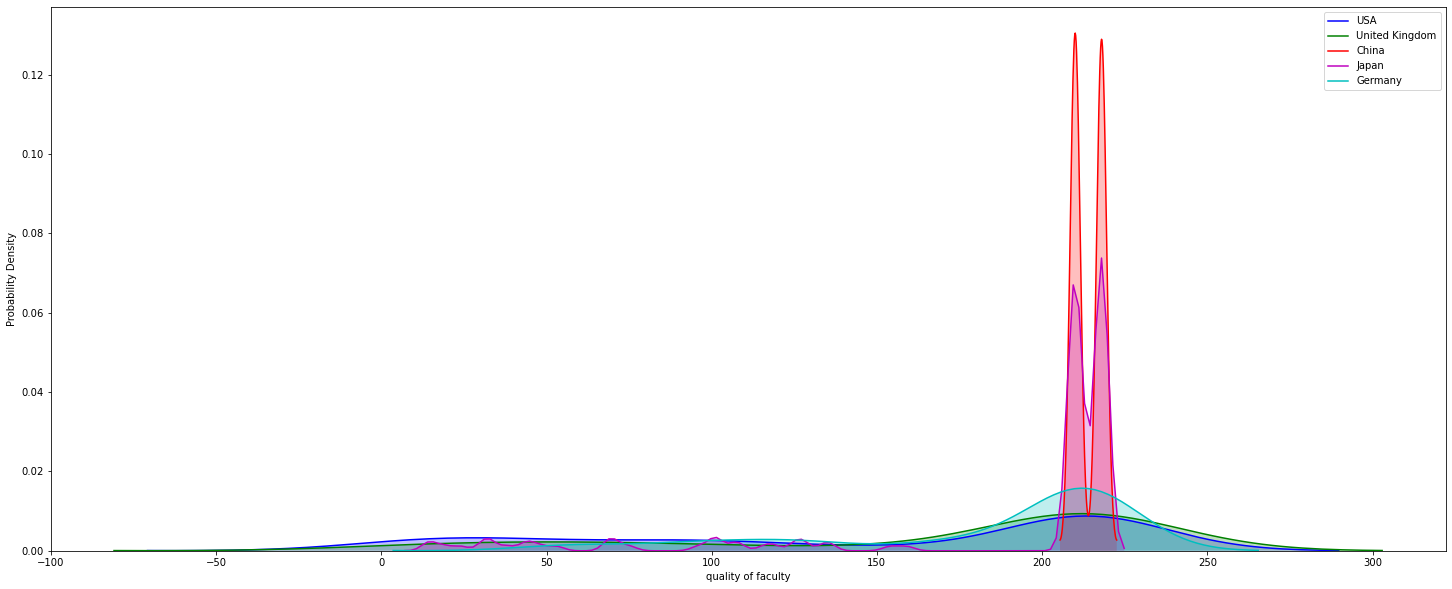

In [121]:
df1['country'].replace([0], 'USA', inplace=True) 
df1['country'].replace([1], 'United Kingdom', inplace=True) 
df1['country'].replace([2], 'China', inplace=True)   
df1['country'].replace([2], 'Japan', inplace=True)   
df1['country'].replace([2], 'Germany', inplace=True)   

f,ax=plt.subplots(1,1,figsize=(25,10))
sns.kdeplot(df1.loc[(df1['country']=='USA'), 'quality_of_faculty'], color='b', shade=True, Label='USA')
sns.kdeplot(df1.loc[(df1['country']=='United Kingdom'), 'quality_of_faculty'], color='g', shade=True, Label='United Kingdom')
sns.kdeplot(df1.loc[(df1['country']=='China'), 'quality_of_faculty'], color='r', shade=True, Label='China')
sns.kdeplot(df1.loc[(df1['country']=='Japan'), 'quality_of_faculty'], color='m', shade=True, Label='Japan')
sns.kdeplot(df1.loc[(df1['country']=='Germany'), 'quality_of_faculty'], color='c', shade=True, Label='Germany')
plt.xlabel('quality of faculty') 
plt.ylabel('Probability Density')

**Pairplot**

In [ ]:
sns.pairplot(df1,vars = ['quality_of_education','alumni_employment','quality_of_faculty','publications', 'influence','citations'] )

**Distplot**

In [ ]:
f,axes=plt.subplots (1,1,figsize=(15,4))
sns.distplot(df1['score'],kde=True,hist=True,color="r")

**Histogram**

In [ ]:
df_h=df1.drop(['world_rank','institution','country','national_rank','year'],axis=1)

In [ ]:
hist_mean=df_h.hist(bins=10, figsize=(15, 15),grid=False,)

In [ ]:
df2014 = df1[df1.year == 2014].iloc[:100,:]
df2015 = df1[df1.year == 2015].iloc[:100,:]
df2012 = df1[df1.year == 2012].iloc[:100,:]

In [ ]:
# creating trace for year 2014
trace_2014 = go.Scatter(x = df2014.world_rank, y = df2014.citations, mode = "markers", name = "2014", marker = dict(color = 'rgba(255, 128, 255, 0.8)'), text= df2014.institution)
# creating trace for year 2015
trace_2015 = go.Scatter(x = df2015.world_rank,y = df2015.citations,mode = "markers",name = "2015",marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                        text= df2015.institution)
# creating trace for year 2016
trace_2012 = go.Scatter(x = df2012.world_rank,y = df2012.citations, mode = "markers", name = "2016", marker = dict(color = 'rgba(0, 255, 200, 0.8)'),text= df2012.institution)

In [ ]:
# Create a list to add traces
data = [trace_2014, trace_2015, trace_2012]

layout = dict(title = 'Citation vs world rank of top 100 universities in year 2014, 2015 and 2012',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False))
fig2 = dict(data = data, layout = layout)
iplot(fig2)

**Wordcloud**

In [ ]:
from wordcloud import WordCloud 
df2=df1['country'].to_string()
# Start with one review:
text = df2
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
f,ax=plt.subplots(1,1,figsize=(25,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**1.Linear Regression**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['country']=le.fit_transform(df1['country'])

In [ ]:
X = df1.drop(['score','institution','year'],axis=1)
Y = df1['score']
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
model = lm.fit(X,Y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

In [ ]:
Y_Pred = lm.predict(x_test)
print('Linear Regression R squared: %.2f' % lm.score(x_test, y_test))

In [ ]:
mse = mean_squared_error(Y_Pred, y_test)
rmse = np.sqrt(mse)
print('Linear Regression RMSE: %.2f' % rmse)

In [ ]:
model.predict(X)

In [ ]:
new_X = [[100,50,8,8,8,9,9,0,8,7,6]]
print(model.predict(new_X))

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
sns.distplot(y_test - predictions, axlabel="Test - Prediction")
plt.show()

**2.Using Classification**

In [ ]:
df1.insert(14,"chances",0,True)
df1.head(1)

In [ ]:
df1.loc[df1['score']> 50, ['chances']] = '1'
df1.loc[df1['score']< 50, ['chances']] = '0'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['country']=le.fit_transform(df1['country'])

In [ ]:
X=X.fillna(0)

In [ ]:
X = df1.drop(['score','institution','year','chances','broad_impact'],axis=1)
Y=df1['chances'].astype(int)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

**K-Fold cross Validation**

In [ ]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))

In [ ]:
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
# It gives you an unbiased estimate of the actual performance you will get at runtime
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
    results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

**Random Forest Classifier**

In [ ]:
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy=ran_class.score(x_test,y_test)
print(accuracy*100,'%')
cm = confusion_matrix(y_test, ran_predict)
sns.heatmap(cm, annot= True)

**ROC curve**

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ran_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
train_score = ran_class.score(x_train,y_train)
test_score = ran_class.score(x_test,y_test)
print(f'Training Accuracy of our model is: {train_score}')
print(f'Test Accuracy of our model is: {test_score}')

In [ ]:
prediction = ran_class.predict(x_train.iloc[15].values.reshape(1,-1))
actual_value = y_train.iloc[15]
print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')